In [1]:
import fastf1
import bar_chart_race as bcr
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastf1.plotting 
from timple.timedelta import strftimedelta
fastf1.Cache.enable_cache('ff1Cache')
import seaborn as sns
sns.set(color_codes=True)
from matplotlib.collections import LineCollection
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from Module_F1 import Qualy_team, Qualy_driver, Gap, plot_fastest_team, plot_fastest_driver, map_graph, GapToLeaderByLap, PositionByLap, dict_colors, regression 
import matplotlib as mpl 
import warnings

In [2]:
session_Q = fastf1.get_session(2023, 1, 'Q')
session_Q.load()
session_Q.results

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,1.0,0.0,0 days 00:01:31.295000,0 days 00:01:30.503000,0 days 00:01:29.708000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,Sergio Perez,2.0,0.0,0 days 00:01:31.479000,0 days 00:01:30.746000,0 days 00:01:29.846000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,F91536,Charles,Leclerc,Charles Leclerc,3.0,0.0,0 days 00:01:31.094000,0 days 00:01:30.282000,0 days 00:01:30,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,F91536,Carlos,Sainz,Carlos Sainz,4.0,0.0,0 days 00:01:30.993000,0 days 00:01:30.515000,0 days 00:01:30.154000,NaT,,0.0
14,14,F ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,Fernando Alonso,5.0,0.0,0 days 00:01:31.158000,0 days 00:01:30.645000,0 days 00:01:30.336000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6CD3BF,George,Russell,George Russell,6.0,0.0,0 days 00:01:31.057000,0 days 00:01:30.507000,0 days 00:01:30.340000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,7.0,0.0,0 days 00:01:31.543000,0 days 00:01:30.513000,0 days 00:01:30.384000,NaT,,0.0
18,18,L STROLL,STR,Aston Martin,358C75,Lance,Stroll,Lance Stroll,8.0,0.0,0 days 00:01:31.184000,0 days 00:01:31.127000,0 days 00:01:30.836000,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293D1,Esteban,Ocon,Esteban Ocon,9.0,0.0,0 days 00:01:31.508000,0 days 00:01:30.914000,0 days 00:01:30.984000,NaT,,0.0
27,27,N HULKENBERG,HUL,Haas F1 Team,B6BABD,Nico,Hulkenberg,Nico Hulkenberg,10.0,0.0,0 days 00:01:31.204000,0 days 00:01:30.809000,NaT,NaT,,0.0


### *Qualifying Session - Bahrain 2023 Grand Prix*###

In [3]:
# Appel Fonctions 

fastest_laps = Qualy_driver(session_Q)
fastest_laps.head()

# Les 5 pilotes les plus rapides de la session de Qualification

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeDelta
0,0 days 01:23:54.472000,1,0 days 00:01:29.708000,14,NaT,NaT,0 days 00:00:28.736000,0 days 00:00:38.514000,0 days 00:00:22.458000,0 days 01:22:53.500000,...,2.0,False,6,0 days 01:22:24.764000,Red Bull Racing,VER,1,True,2023-03-04 16:07:25.761,0.000
1,0 days 01:24:00.743000,11,0 days 00:01:29.846000,14,NaT,NaT,0 days 00:00:28.723000,0 days 00:00:38.537000,0 days 00:00:22.586000,0 days 01:22:59.620000,...,2.0,False,6,0 days 01:22:30.897000,Red Bull Racing,PER,1,True,2023-03-04 16:07:31.894,0.138
2,0 days 01:16:04.860000,16,0 days 00:01:30,16,NaT,NaT,0 days 00:00:28.825000,0 days 00:00:38.614000,0 days 00:00:22.561000,0 days 01:15:03.685000,...,2.0,True,6,0 days 01:14:34.860000,Ferrari,LEC,1,True,2023-03-04 15:59:35.857,0.292
3,0 days 01:24:09.817000,55,0 days 00:01:30.154000,17,NaT,NaT,0 days 00:00:28.739000,0 days 00:00:38.700000,0 days 00:00:22.715000,0 days 01:23:08.402000,...,2.0,False,6,0 days 01:22:39.663000,Ferrari,SAI,1,True,2023-03-04 16:07:40.660,0.446
4,0 days 01:19:51.112000,14,0 days 00:01:30.336000,14,NaT,NaT,0 days 00:00:28.852000,0 days 00:00:38.774000,0 days 00:00:22.710000,0 days 01:18:49.628000,...,2.0,True,5,0 days 01:18:20.776000,Aston Martin,ALO,1,True,2023-03-04 16:03:21.773,0.628


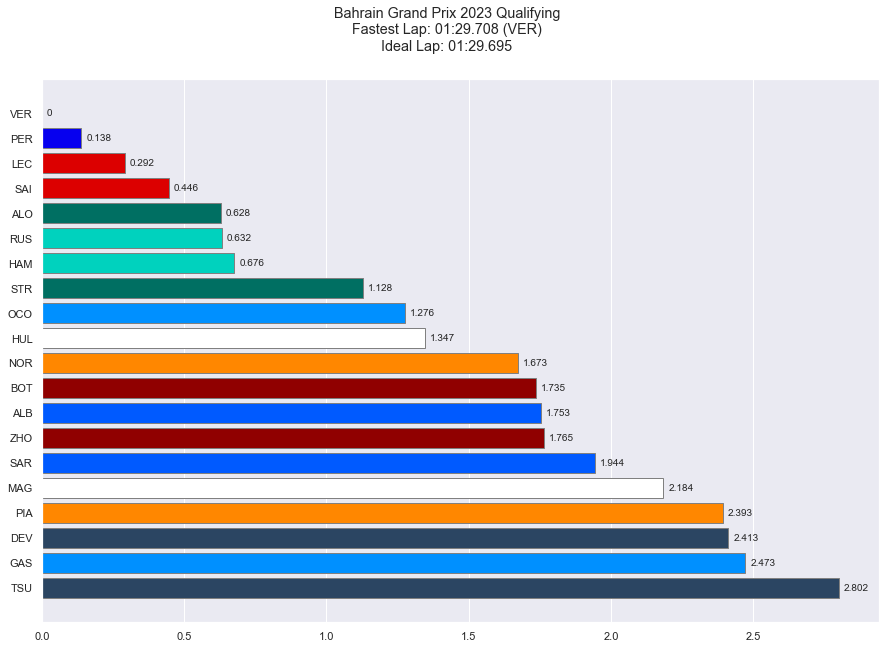

In [4]:
plot_fastest_driver(fastest_laps,session_Q)

In [5]:
Avg_team = Qualy_team(session_Q)

Avg_team.head()

# Les 5 équipes les plus rapides de la session de qualification

,Team,LapTime,LapTimeDelta
0,Red Bull Racing,0 days 00:01:29.777000,0.000
1,Ferrari,0 days 00:01:30.077000,0.300
2,Mercedes,0 days 00:01:30.362000,0.585
3,Aston Martin,0 days 00:01:30.586000,0.809
4,Alfa Romeo,0 days 00:01:31.458000,1.681


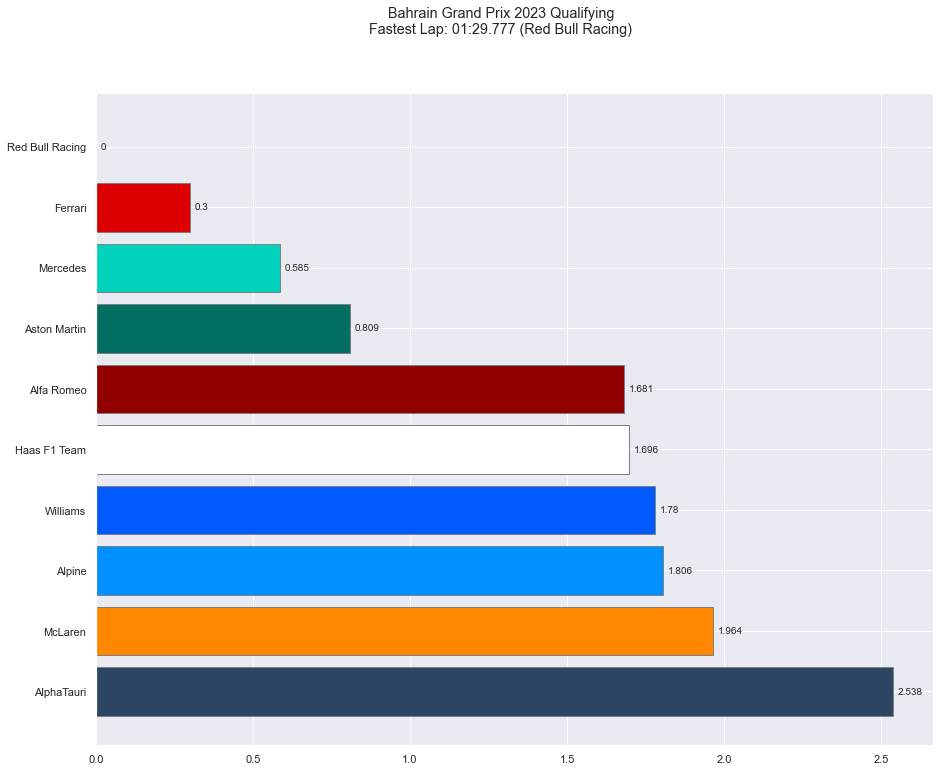

In [6]:
plot_fastest_team(Avg_team,session_Q)

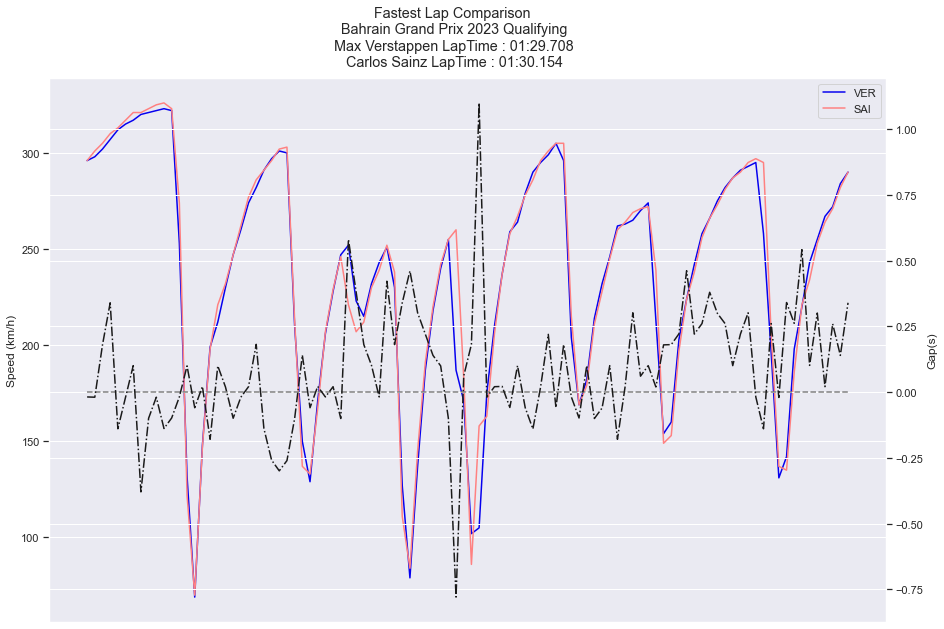

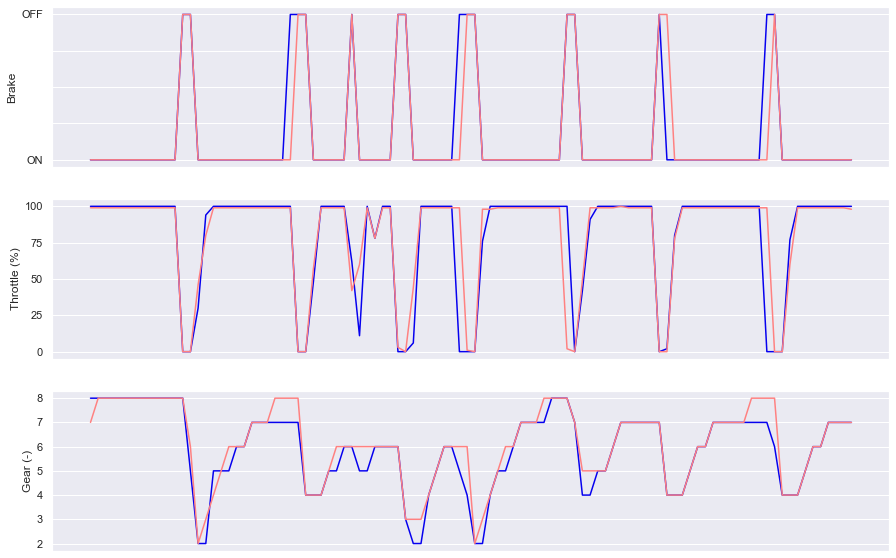

In [7]:
# Graphique Comparaison TOUR (EXEMPLE : VER - SAINZ )

ver, sainz = Gap(session_Q, 'SAI')

fullName = [session_Q.get_driver('VER').FullName,session_Q.get_driver('SAI').FullName]
VER_Lap = session_Q.laps.pick_driver('VER').pick_fastest()['LapTime']
SAINZ_Lap = session_Q.laps.pick_driver('SAI').pick_fastest()['LapTime']

fig,ax = plt.subplots(figsize=(15,10))

ax.plot(ver.index, ver.Speed, color = fastf1.plotting.driver_color('VER'), label='VER')
ax.plot(ver.index, sainz.Speed, color = fastf1.plotting.driver_color('SAI'), label='SAI' )
ax.set_ylabel('Speed (km/h)')

ax2 = ax.twinx()
ax2.plot(ver.index, ver.Time - ver.Time, "--", color = '#808080')
ax2.plot(ver.index, sainz.Time - ver.Time, "-.", color = 'k')
ax2.set_ylabel('Gap(s)')

ax.get_xaxis().set_visible(False)
ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session_Q.event['EventName']} {session_Q.event.year} Qualifying \n"
             f"{fullName[0]} LapTime : {strftimedelta(VER_Lap, '%m:%s.%ms')}\n"
             f"{fullName[1]} LapTime : {strftimedelta(SAINZ_Lap, '%m:%s.%ms')}\n",fontsize='x-large')

numFig, (ax3,ax4,ax5) = plt.subplots(nrows=3,ncols=1,figsize = (15,10))

ax3.plot(ver.index,ver.Brake, color = fastf1.plotting.driver_color('VER'))
ax3.plot(ver.index, sainz.Brake, color = fastf1.plotting.driver_color('SAI'))
ax3.set_yticks([0,0.25,0.5,0.75,1])
ax3.yaxis.set_ticklabels(['ON','','','','OFF'])
ax3.get_xaxis().set_visible(False)
ax3.set_ylabel('Brake')

ax4.plot(ver.index, ver.Throttle, color = fastf1.plotting.driver_color('VER'))
ax4.plot(ver.index, sainz.Throttle, color = fastf1.plotting.driver_color('SAI'))
ax4.set_yticks([0,25,50,75,100])
ax4.get_xaxis().set_visible(False)
ax4.set_ylabel('Throttle (%)')

ax5.plot(ver.index, ver.nGear, color = fastf1.plotting.driver_color('VER'))
ax5.plot(ver.index, sainz.nGear, color = fastf1.plotting.driver_color('SAI'))
ax5.get_xaxis().set_visible(False)
ax5.set_ylabel('Gear (-)')


plt.show()

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    telemetry_f = map_graph(session_Q,5)

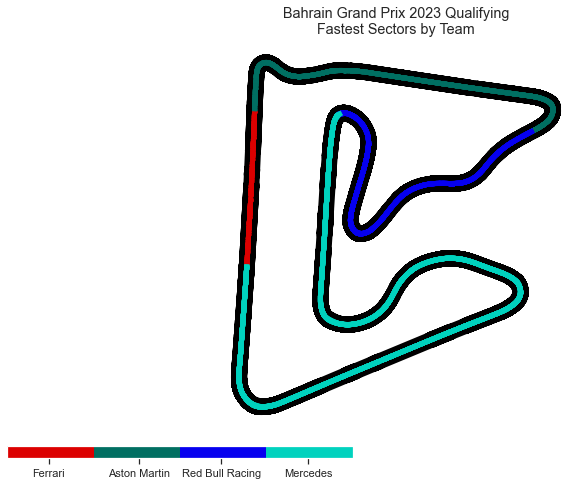

In [9]:
cmap = (mpl.colors.ListedColormap(telemetry_f.Color))
n = telemetry_f.Minisector.to_numpy().astype(float)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    x = telemetry_f.X
    y = telemetry_f.Y   

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    fig, ax = plt.subplots( figsize=(12, 6.75))

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.12)
    ax.axis('off')
    # After this, we plot the data itself.
    # Create background track line
    ax.plot(telemetry_f.X, telemetry_f.Y, color='black', linestyle='-', linewidth=16, zorder=0)
    # Create a continuous norm to map from data points to colors
    #norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=cmap, linestyle='dashed', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(n)

    # Merge all line segments together
    line = ax.add_collection(lc)

    #Legend
    cbaxes = fig.add_axes([0.05, 0.05, 0.4, 0.025])
    legend = mpl.colorbar.ColorbarBase(cbaxes,cmap = (mpl.colors.ListedColormap(telemetry_f.Color.unique())), orientation="horizontal")
    legend.set_ticks([0.12,0.38,0.62,0.87])
    legend.set_ticklabels(telemetry_f.Team_Sect.unique())
    
    #ax.arrow(telemetry_f.X[10]-1000,telemetry_f.Y[10]-1000,telemetry_f.X[400]-telemetry_f.X[10],telemetry_f.Y[400]-telemetry_f.Y[10],color='black',width=200)
    
    plt.suptitle(f"{session_Q.event['EventName']} {session_Q.event.year} Qualifying\n"
                 
                 "Fastest Sectors by Team",fontsize="x-large")
    
    
    plt.show()

### *Race Session - Bahrain 2023 Grand Prix*###

In [10]:
session_R = fastf1.get_session(2023, 1, 'r')
session_R.load()
session_R.results

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:33:56.736000,Finished,25.0
11,11,S PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,Sergio Perez,2.0,2.0,NaT,NaT,NaT,0 days 01:34:08.723000,Finished,18.0
14,14,F ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,Fernando Alonso,3.0,5.0,NaT,NaT,NaT,0 days 01:34:35.373000,Finished,15.0
55,55,C SAINZ,SAI,Ferrari,F91536,Carlos,Sainz,Carlos Sainz,4.0,4.0,NaT,NaT,NaT,0 days 01:34:44.788000,Finished,12.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,5.0,7.0,NaT,NaT,NaT,0 days 01:34:47.713000,Finished,10.0
18,18,L STROLL,STR,Aston Martin,358C75,Lance,Stroll,Lance Stroll,6.0,8.0,NaT,NaT,NaT,0 days 01:34:51.238000,Finished,8.0
63,63,G RUSSELL,RUS,Mercedes,6CD3BF,George,Russell,George Russell,7.0,6.0,NaT,NaT,NaT,0 days 01:34:52.609000,Finished,6.0
77,77,V BOTTAS,BOT,Alfa Romeo,C92D4B,Valtteri,Bottas,Valtteri Bottas,8.0,12.0,NaT,NaT,NaT,0 days 01:35:09.383000,Finished,4.0
10,10,P GASLY,GAS,Alpine,2293D1,Pierre,Gasly,Pierre Gasly,9.0,20.0,NaT,NaT,NaT,0 days 01:35:10.489000,Finished,2.0
23,23,A ALBON,ALB,Williams,37BEDD,Alexander,Albon,Alexander Albon,10.0,15.0,NaT,NaT,NaT,0 days 01:35:26.510000,Finished,1.0


In [11]:
fastf1.api.make_path('Bahrain Grand Prix', '2023-03-05','Race','2023-03-05')
DataFrame = fastf1.api.timing_data('/static/2023/2023-03-05_Bahrain_Grand_Prix/2023-03-05_Race/')

api            INFO 	Using cached data for timing_data


In [12]:
Pos = PositionByLap(DataFrame,session_R)

Colors = dict_colors(session_R)

Pos.head()

,Position,Driver,LapNumber
0,1,VER,1
1,1,VER,2
2,1,VER,3
3,1,VER,4
4,1,VER,5


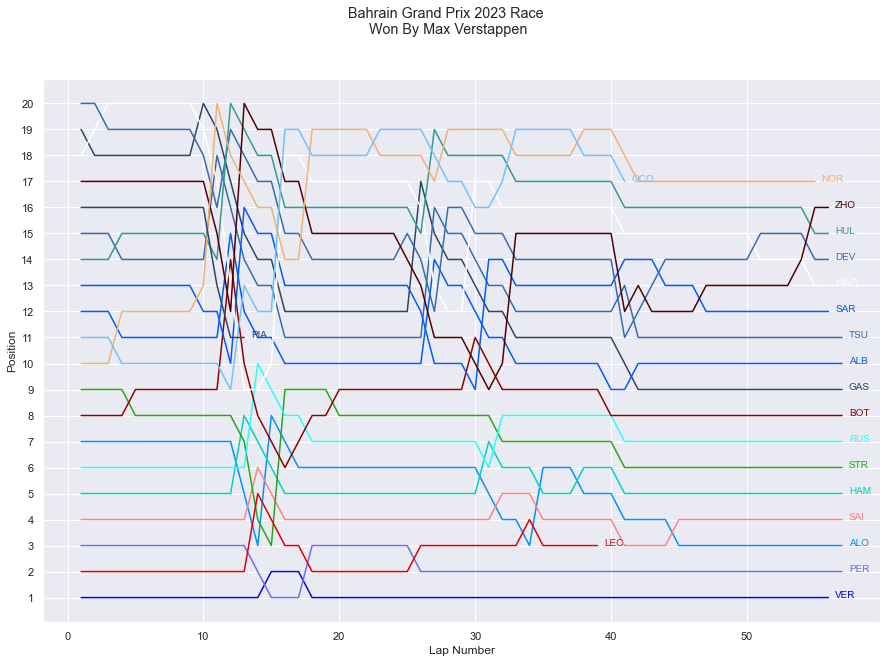

In [31]:
fig,ax = plt.subplots(figsize=(15,10))
for driver in Pos.Driver.unique():
    Pos[Pos.Driver == driver].plot('LapNumber','Position',ax=ax,color=Colors[driver],label=driver)
ax.get_legend().remove()
ax.set_xlabel('Lap Number')
ax.set_ylabel('Position')
ax.set_yticks(range(1,21,1))
fullname = Pos.Driver.unique()[0]

plt.suptitle(f"{session_R.event['EventName']} {session_R.event.year} Race \n"
             f"Won By {session_R.get_driver(fullname)['FullName']}",fontsize='x-large')


for line, name in zip(ax.lines, Pos.Driver.unique()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    text = ax.annotate(name, xy=(x + 0.5, y), xytext=(0, 0), 
    color=line.get_color(), textcoords="offset points")
    

In [511]:
Colors = [fastf1.plotting.driver_color(i) if i not in ['SAR','DEV'] else (fastf1.plotting.driver_color('ALB') if i=='SAR' else fastf1.plotting.driver_color('TSU')) for i in session_Q.laps.Driver.unique()]

frame = GapToLeaderByLap(DataFrame,session_Q)

frame.set_index('LapNumber',inplace=True)

import bar_chart_race as bcr
import matplotlib.pyplot as plt 
    
plt.rcParams['animation.ffmpeg_path'] = 'Users/mmadidaroueche/Documents/1ECOLE/NADE/ffmpeg'

def period_summary(values,rank):
    
    top2 = values.nsmallest(2)
    leader = top2.index[0]
    lead = top2.iloc[1] - top2.iloc[0]
    s = f'{leader} leading by {lead:.0f} s'
    return {'s': s, 'x': .99, 'y': .03, 'ha': 'right', 'size': 8}

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    bcr.bar_chart_race(df=frame,title = 'Gap To Lead by Lap',
        sort = 'desc',
        fixed_max=True,
        fixed_order=False,
        interpolate_period=False,
        label_bars=True,
        period_summary_func=period_summary,
        fig=None,
        writer = None,
        scale = 'linear',
        shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
        period_fmt='Lap {x:,.0f}',
        cmap=Colors,
        filename=None)

/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

animation       INFO 	Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
animation       INFO 	figure size in inches has been adjusted from 6.130208333333333 x 3.5 to 6.125 x 3.5
animation       INFO 	MovieWriter._run: running command: /Users/mmadidaroueche/Documents/1ECOLE/NADE/ffmpeg -f rawvideo -vcodec rawvideo -s 882x504 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/6g/0whkj2wj12q488lgjfp50rr00000gn/T/tmpcqpbvof2/temp.m4v


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



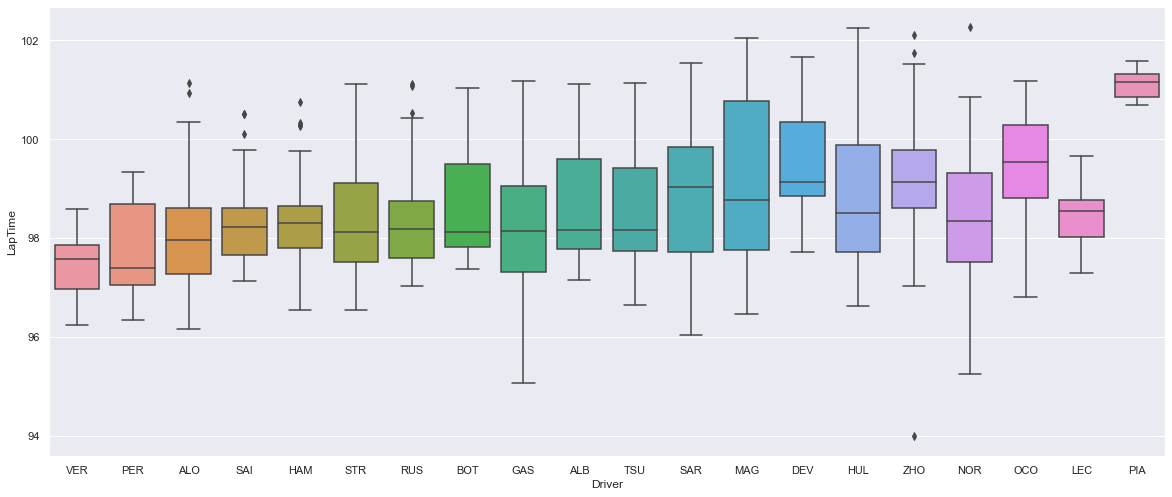

In [40]:
Laps = session_R.laps.pick_accurate()
with warnings
Laps.loc[:,'LapTime'] = Laps['LapTime'].apply(lambda x : x.total_seconds())

sns.boxplot(data=Laps, x='Driver',y='LapTime')
sns.set(rc={'figure.figsize':(20,15)})

In [41]:
fig = px.box(Laps, x="Driver", y="LapTime",color='Driver',width=900, height=500)
fig.show()

In [42]:
fig = px.box(Laps, x="Team", y="LapTime",color='Team',width=1000, height=500)
fig.show()

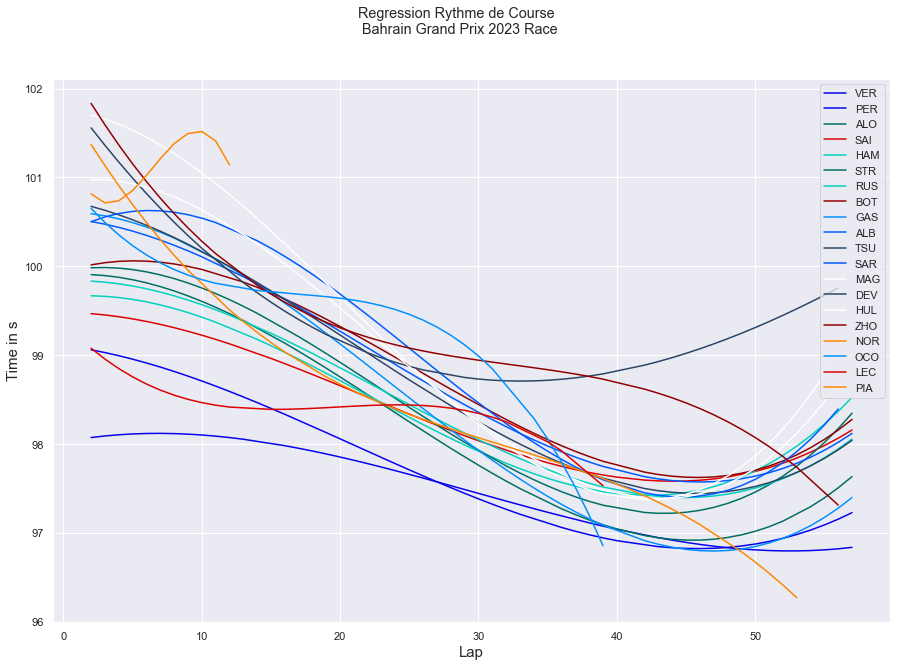

In [49]:
plt.figure(figsize=(15,10))
for i in Laps.Driver.unique():
    plt.plot(regression(Laps,i)[0],regression(Laps,i)[1],label = i,color = fastf1.plotting.team_color(Laps[Laps['Driver']==i]['Team'].iloc[0]))
plt.legend()
plt.xlabel('Lap', fontsize = 15)
plt.ylabel('Time in s', fontsize = 15)
plt.suptitle(f"Regression Rythme de Course \n "
            f"{session_R.event['EventName']} {session_R.event.year} Race")
plt.show()